# Visualize Data

In [1]:
import os
import pandas as pd
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Generamos una lista con todas las columnas de los archivos a analizar.

In [2]:
columns_export =\
    ["FECHAACEPT", "NUMEROIDENT", "ADUANA", "TIPOOPERACION",
     "CODIGORUTEXPORTADORPPAL", "NRO_EXPORTADOR",
     "PORCENTAJEEXPPPAL", "COMUNAEXPORTADORPPAL", "CODIGORUTEXPSEC",
     "NRO_EXPORTADOR_SEC", "PORCENTAJEEXPSECUNDARIO",
     "COMUNAEXPSECUNDARIO", "PUERTOEMB", "GLOSAPUERTOEMB",
     "REGIONORIGEN", "TIPOCARGA", "VIATRANSPORTE", "PUERTODESEMB",
     "GLOSAPUERTODESEMB", "PAISDESTINO", "GLOSAPAISDESTINO",
     "NOMBRECIATRANSP", "PAISCIATRANSP", "RUTCIATRANSP",
     "DVRUTCIATRANSP", "NOMBREEMISORDOCTRANSP", "RUTEMISOR",
     "DVRUTEMISOR", "CODIGOTIPOAUTORIZA", "NUMEROINFORMEEXPO",
     "DVNUMEROINFORMEEXP", "FECHAINFORMEEXP", "MONEDA",
     "MODALIDADVENTA", "CLAUSULAVENTA", "FORMAPAGO",
     "VALORCLAUSULAVENTA", "COMISIONESEXTERIOR", "OTROSGASTOS",
     "VALORLIQUIDORETORNO", "NUMEROREGSUSP", "ADUANAREGSUSP",
     "PLAZOVIGENCIAREGSUSP", "TOTALITEM", "TOTALBULTOS",
     "PESOBRUTOTOTAL", "TOTALVALORFOB", "VALORFLETE", "CODIGOFLETE",
     "VALORSEGURO", "CODIGOSEG", "VALORCIF", "NUMEROPARCIALIDAD",
     "TOTALPARCIALES", "PARCIAL", "OBSERVACION",
     "NUMERODOCTOCANCELA", "FECHADOCTOCANCELA", "TIPODOCTOCANCELA",
     "PESOBRUTOCANCELA", "TOTALBULTOSCANCELA", "NUMEROITEM",
     "NOMBRE", "ATRIBUTO1", "ATRIBUTO2", "ATRIBUTO3", "ATRIBUTO4",
     "ATRIBUTO5", "ATRIBUTO6", "CODIGOARANCEL", "UNIDADMEDIDA",
     "CANTIDADMERCANCIA", "FOBUNITARIO", "FOBUS",
     "CODIGOOBSERVACION1", "VALOROBSERVACION1", "GLOSAOBSERVACION1",
     "CODIGOOBSERVACION2", "VALOROBSERVACION2", "GLOSAOBSERVACION2",
     "CODIGOOBSERVACION3", "VALOROBSERVACION3", "GLOSAOBSERVACION3",
     "PESOBRUTOITEM", "FECHAACEPTPACKAGE", "NUMEROBULTO",
     "TIPOBULTO", "CANTIDADBULTO", "IDENTIFICACIONBULTO",
     "FECHAACEPTTRANSPORT", "NSECDOCTRANSP",
     "NUMERODOCTRANSP", "FECHADOCTRANSP", "NOMBRENAVE",
     "NUMEROVIAJE"]
    
columns_import =\
    ["TPO_DOCTO", "ADU", "FORM", "FECVENCI", "CODCOMUN", "NUM_UNICO_IMPORTADOR",
     "CODPAISCON", "DESDIRALM", "CODCOMRS", "ADUCTROL", "NUMPLAZO",
     "INDPARCIAL", "NUMHOJINS", "TOTINSUM", "CODALMA", "NUM_RS", "FEC_RS",
     "ADUA_RS", "NUMHOJANE", "NUM_SEC", "PA_ORIG", "PA_ADQ", "VIA_TRAN",
     "TRANSB", "PTO_EMB", "PTO_DESEM", "TPO_CARGA", "ALMACEN", "FEC_ALMAC",
     "FECRETIRO", "NU_REGR", "ANO_REG", "CODVISBUEN", "NUMREGLA", "NUMANORES",
     "CODULTVB", "PAGO_GRAV", "FECTRA", "FECACEP", "GNOM_CIA_T", "CODPAISCIA",
     "NUMRUTCIA", "DIGVERCIA", "NUM_MANIF", "NUM_MANIF1", "NUM_MANIF2",
     "FEC_MANIF", "NUM_CONOC", "FEC_CONOC", "NOMEMISOR", "NUMRUTEMI",
     "DIGVEREMI", "GREG_IMP", "REG_IMP", "BCO_COM", "CODORDIV", "FORM_PAGO",
     "NUMDIAS", "VALEXFAB", "MONEDA", "MONGASFOB", "CL_COMPRA", "TOT_ITEMS",
     "FOB", "TOT_HOJAS", "COD_FLE", "FLETE", "TOT_BULTOS", "COD_SEG", "SEGURO",
     "TOT_PESO", "CIF", "NUM_AUT", "FEC_AUT", "GBCOCEN", "ID_BULTOS",
     "TPO_BUL1", "CANT_BUL1", "TPO_BUL2", "CANT_BUL2", "TPO_BUL3", "CANT_BUL3",
     "TPO_BUL4", "CANT_BUL4", "TPO_BUL5", "CANT_BUL5", "TPO_BUL6", "CANT_BUL6",
     "TPO_BUL7", "CANT_BUL7", "TPO_BUL8", "CANT_BUL8", "CTA_OTRO", "MON_OTRO",
     "CTA_OTR1", "MON_OTR1", "CTA_OTR2", "MON_OTR2", "CTA_OTR3", "MON_OTR3",
     "CTA_OTR4", "MON_OTR4", "CTA_OTR5", "MON_OTR5", "CTA_OTR6", "MON_OTR6",
     "CTA_OTR7", "MON_OTR7", "MON_178", "MON_191", "FEC_501", "VAL_601",
     "FEC_502", "VAL_602", "FEC_503", "VAL_603", "FEC_504", "VAL_604",
     "FEC_505", "VAL_605", "FEC_506", "VAL_606", "FEC_507", "VAL_607", "TASA",
     "NCUOTAS", "ADU_DI", "NUM_DI", "FEC_DI", "MON_699", "MON_199", "NUMITEM",
     "DNOMBRE", "DMARCA", "DVARIEDAD", "DOTRO1", "DOTRO2", "ATR_5", "ATR_6",
     "SAJU_ITEM", "AJU_ITEM", "CANT_MERC", "MERMAS", "MEDIDA", "PRE_UNIT",
     "ARANC_ALA", "NUMCOR", "NUMACU", "CODOBS1", "DESOBS1", "CODOBS2",
     "DESOBS2", "CODOBS3", "DESOBS3", "CODOBS4", "DESOBS4", "ARANC_NAC",
     "CIF_ITEM", "ADVAL_ALA", "ADVAL", "VALAD", "OTRO1", "CTA1", "SIGVAL1",
     "VAL1", "OTRO2", "CTA2", "SIGVAL2", "VAL2", "OTRO3", "CTA3", "SIGVAL3",
     "VAL3", "OTRO4", "CTA4", "SIGVAL4", "VAL4"]

In [21]:
def count_product(types, years):
    
    if types == "Importation":
        path = "Filter_Data" + os.sep + "import"
        columns = columns_import
        usecols =  ["ARANC_NAC", "ARANC_ALA"]
        
    else:
        path = "Filter_Data" + os.sep + "export"
        types = "Exportation"
        columns = columns_export
        usecols =  ["CODIGOARANCEL"]

    chunksize = 10 ** 3
    diferent_code = 0
    df = pd.DataFrame(columns = ["Year-Month", types])
    
    for year in years:
        year_path = path + os.sep+ year
        
        for month in os.listdir(year_path):
            filename = year_path + os.sep + month
            number = 0
            
            for chunk in pd.read_csv(filename, chunksize=chunksize, names=columns,
                                     header=None, sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                                     usecols = usecols):
                
                if types == "Importation":
                    for index, row in chunk.iterrows():
                        aranc_ala = row["ARANC_ALA"]
                        aranc_nac = row["ARANC_NAC"]

                        if aranc_ala != aranc_nac:
                            diferent_code += 1

                number += chunk.shape[0]

            df = df.append(pd.Series(["{} - {}".format(year, month[:2]), number], 
                                     index=["Year-Month", types]),
                           ignore_index=True,)
    return df, diferent_code

Hay 32010 de 35278 productos importados con codigo arancel Aladi y codigo arancel armonizado diferentes


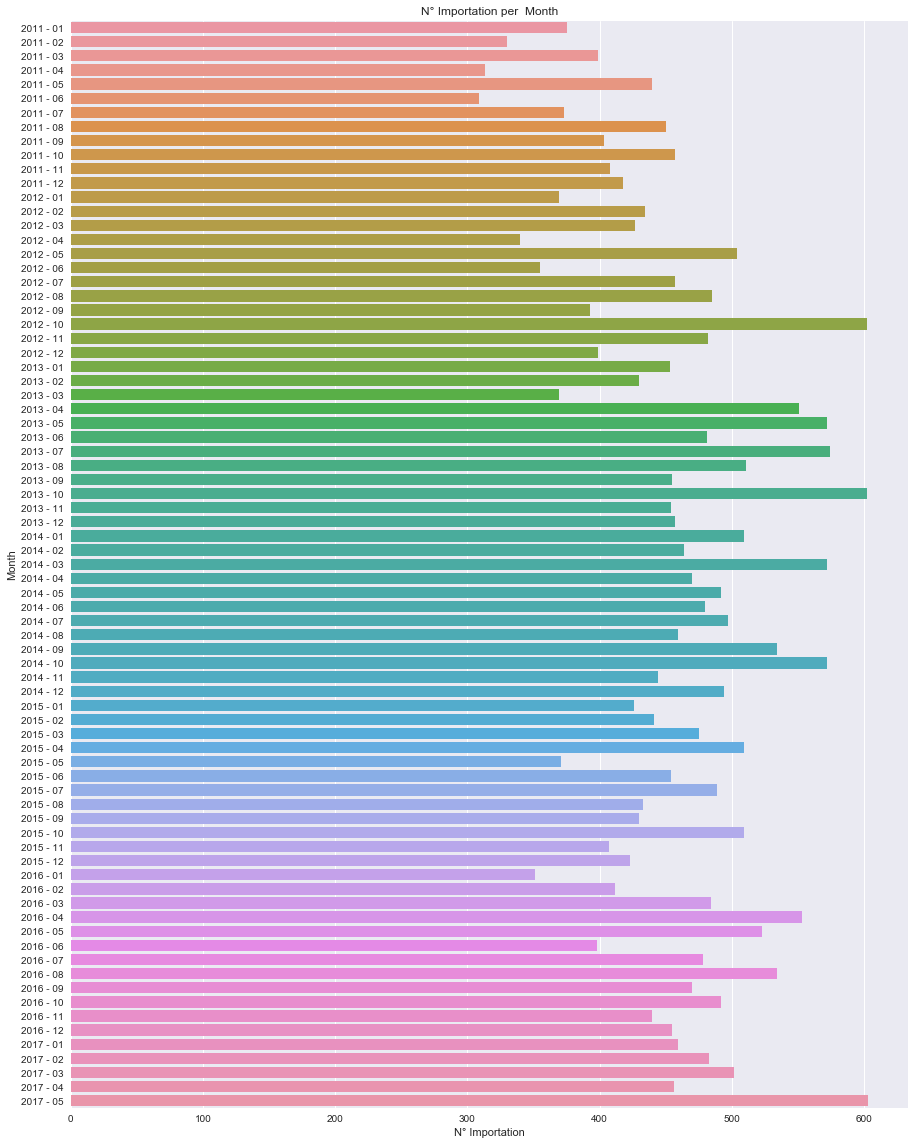

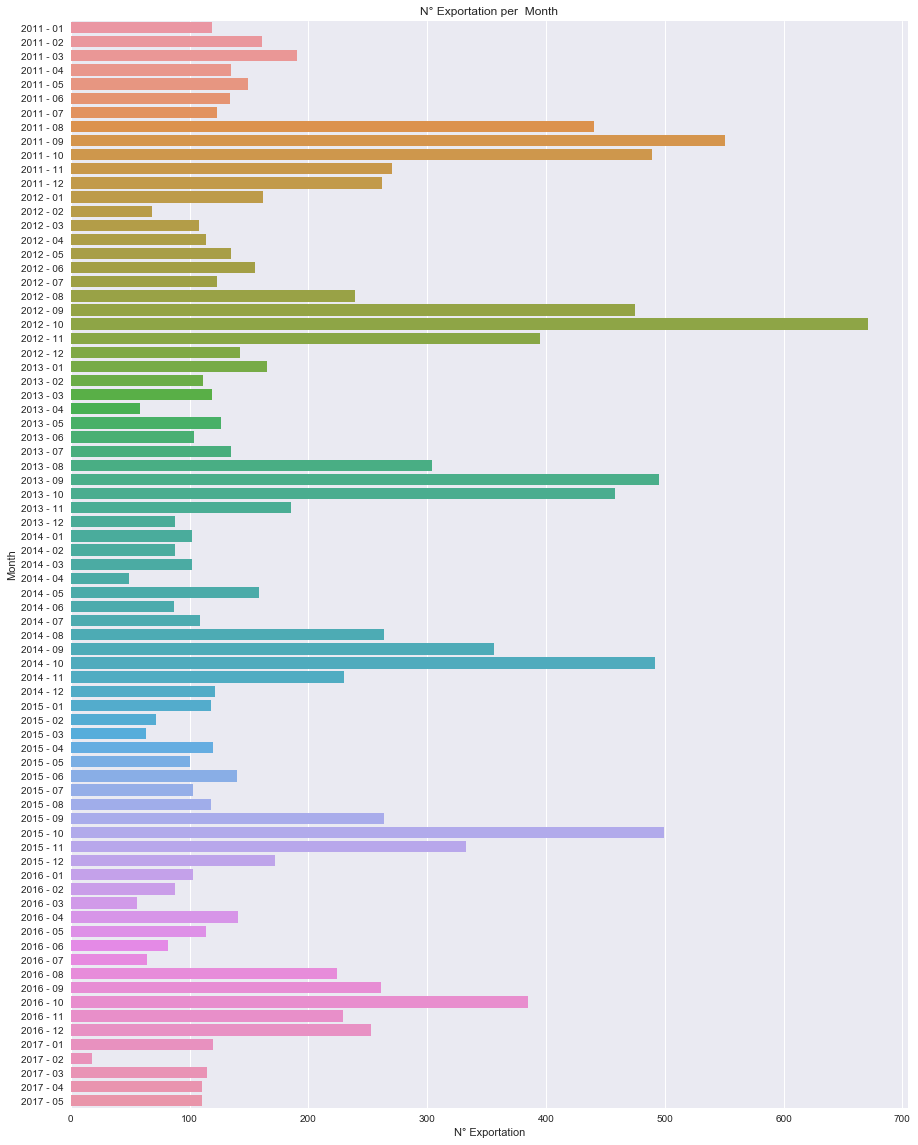

In [27]:
years = ["2011", "2012", "2013", "2014", "2015", "2016", "2017"]

importation, diferent_code_im = count_product("Importation", years)
exportation, diferent_code_ex = count_product("Exportation", years)

print("Hay {} de {} productos importados con codigo arancel Aladi y codigo arancel armonizado diferentes".format(diferent_code_im, importation["Importation"].sum()))

plt.figure(figsize=(15, 20))

# Plot the total crashes
sns.set_color_codes("pastel")
barplot = sns.barplot(x="Importation", y="Year-Month", data=importation)

# Add a legend and informative axis label
sns.despine(left=True, bottom=True)
barplot.set(xlabel='N° Importation', ylabel='Month')
barplot.set_title('N° Importation per  Month')

plt.show()

plt.figure(figsize=(15, 20))

# Plot the total crashes
sns.set_color_codes("pastel")
barplot = sns.barplot(x="Exportation", y="Year-Month", data=exportation)

# Add a legend and informative axis label
sns.despine(left=True, bottom=True)
barplot.set(xlabel='N° Exportation', ylabel='Month')
barplot.set_title('N° Exportation per  Month')


plt.show()